# GateRNN
本篇主要是想利用pytorch复现《深度学习进阶--自然语言处理》第六章内容，读取数据分析结果依旧用书中代码。
RNN部分主要参考 
https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html

GRU文档：https://pytorch.org/docs/stable/generated/torch.nn.GRU.html#torch.nn.GRU


## 模型创建

In [27]:
import torch
import torch.nn as nn

# torch.cuda.is_available
device = torch.cuda.get_device_name() if torch.cuda.is_available() else "cpu"



print(f"use device {device} ")

class Rnnlm(nn.Module):
    def __init__(self,vocab_size=10000,wordvec_size=1000):
        super(Rnnlm,self).__init__()
        self.embedding = nn.Embedding(vocab_size,wordvec_size)
        self.rnn = nn.LSTM(wordvec_size, 256 ,batch_first = True,bias=False)
        self.affine = nn.Linear(256,vocab_size,bias=False)
        self.softmax = nn.Softmax(dim=-1)
        self.flatten = nn.Flatten(0,-2)

    def forward(self,input,h_c):
        embeded = self.embedding(input)
        output = embeded


        output, hc = self.rnn(output,h_c)
        output = self.affine(output)
        output = self.softmax(output)
        output = self.flatten(output)
        return output,hc


    ## 测试模型
x  = [
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
    ]

x = torch.Tensor(x).long().to(device = device)

input = x[:,   :    -1].to(device=device)
target =x[:,1  : ].to(device=device)

print(input)






#hiden = torch.zeros((1,3,5),dtype=torch.float32)



# tmodel = Rnnlm(50,5).to(device = device)


# target = torch.flatten(target)
# criterion = torch.nn.NLLLoss()
# optimizer = torch.optim.SGD(tmodel.parameters(),lr = 0.9)
# for i in range(1000):
#     hidden = None
#     out ,hidden= tmodel(input,hidden)
#     loss = criterion(out,target)

#     print(loss.item())
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()


# embed = nn.Embedding(20,5)
# input = embed(x)
# print(f"input.shape:{input.shape}")

# lstm = nn.LSTM(5,20)
# c = None

# output,c = lstm(input,None)

# print(output.shape)
# print(c)




# print(f"out.shape:{out.size()}")

# softmax = nn.Softmax(dim=-1)
# test = torch.zeros((2,5,4),dtype=torch.float32)
# test[:,:,3] = 1

# test[0,2,0] = 3
# print(test)
# print(softmax(test))



use device Tesla K80 


RuntimeError: ignored

In [17]:
a = torch.tensor([[2]]).to(device=device)
h_c = None

out, hc = tmodel.forward(a,None)
print(out.topk(5))

torch.return_types.topk(
values=tensor([[0.6218, 0.3233, 0.0197, 0.0176, 0.0063]], device='cuda:0',
       grad_fn=<TopkBackward0>),
indices=tensor([[ 3, 10, 11,  7,  2]], device='cuda:0'))


In [ ]:

## 训练弄型
def train(model:Rnnlm,criterion,optimizer,input,target,h = None):
    optimizer.zero_grad()
    pred ,h = model(input,h)
    loss = criterion(pred)
    loss.backfard()
    optimizer.step()

    return loss,h


In [ ]:
# def train_dataset(model:Rnnlm,
#  criterion = nn.CrossEntropyLoss(),
#  optimizer:torch.optim.Optimizer = None,
#  input = None ,
#  target = None
#   max_iters = 100,
#   batch_size = 500,
#   time_size = 10 ):


## 加载数据


### colab加载主公共模块

In [18]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append("/content/drive/MyDrive/ml/nlp/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 本机环境中用当前前目录

In [ ]:
import sys
sys.path.append("../")

In [19]:


import sys

import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
import time 
import math
import numpy as np



batch_size = 5

time_size = 10

wordvec_size = 100
hidden_size=100

lr = 0.1
max_epoch = 100


corpus , word_to_id,id_to_word = ptb.load_data('train')
corpus_size = 1000


#corpus = corpus[:corpus_size]
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]


data_size = len(corpus)
print("corpus size %d ,vocabulary size : %d, " % (corpus_size,vocab_size))

max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0


loss_count = 0
ppl_list = []


print(f"vocab_size = {vocab_size} wordvec_size= {wordvec_size} hidden_size = {hidden_size}")



device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = Rnnlm(vocab_size,wordvec_size)
model.to(device=device)

optimizer = torch.optim.SGD(model.parameters(), lr=2)

criterion = torch.nn.CrossEntropyLoss()


model.train()

 



corpus size 1000 ,vocabulary size : 10000, 
vocab_size = 10000 wordvec_size= 100 hidden_size = 100


Rnnlm(
  (embedding): Embedding(10000, 100)
  (rnn): LSTM(100, 256, bias=False, batch_first=True)
  (affine): Linear(in_features=256, out_features=10000, bias=False)
  (softmax): Softmax(dim=-1)
  (flatten): Flatten(start_dim=0, end_dim=-2)
)

## 训练数据读取






In [20]:
import numpy as np
import time

time_size = 20
batch_size = 200

max_grad = 0.25
criterion = torch.nn.NLLLoss()


optimizer = torch.optim.SGD(model.parameters(),lr=0.8)

eval_iterval = 20
for epoch in range(max_epoch):

    
   
    for  iter in range(max_iters -1):


        start_idx = iter * (batch_size * time_size)
        end_idx = (iter + 1) * (batch_size * time_size)

        batch_x = xs[start_idx:end_idx]
        batch_t = ts[start_idx:end_idx]


        # batch_x = xs[0 : 500 * time_size]
        # batch_t = ts[0 : 500 * time_size]

 
        batch_x = batch_x.reshape(batch_size,time_size) 
        #batch_t = batch_t.reshape(batch_size,time_size)


        batch_x = torch.from_numpy(batch_x).to(device=device)
        batch_t = torch.from_numpy(batch_t).to(device=device)


        h = None
        model.zero_grad()
        pred  ,h = model(batch_x,h)
        loss = criterion(pred,batch_t)
        loss.backward()
        
      #   params = model.parameters()

      #   for param in params:
      # ##    print(param.grad.data)
      #     param.data.add_(param.grad.data, alpha= -1)
      
       # loss , h = train(model,criterion,optimizer,batch_x,batch_t,h,max_grad)

      #  print(loss)

        total_loss += loss.item()
        loss_count += 1
        if (iter % eval_iterval) == 0:
            ppl = math.exp(total_loss / loss_count)
            print(f"epoch  {epoch }/{max_epoch}\t|\t time :{time.time() - start_time}[s] \t|\t perplexity:{ppl}")
            total_loss = 0
            loss_count = 0

NameError: ignored

In [23]:
import numpy as np
import time



model = Rnnlm(100,wordvec_size)
model.to(device=device)

batch_size = 200
time_size = 10
max_grad = 0.25
criterion = torch.nn.NLLLoss()


adam = torch.optim.Adam(model.parameters(),lr=1)

eval_iterval = 20

ppl_list = []

loss_list = []
loss = 0
h = None
for epoch in range(max_epoch):

    
   
    for  iter in range(max_iters -1):


        # start_idx = iter * (batch_size * time_size)
        # end_idx = (iter + 1) * (batch_size * time_size)

        start_idx = 0 * (batch_size * time_size)
        end_idx = (0 + 1) * (batch_size * time_size)

        batch_x = xs[start_idx:end_idx]
        batch_t = ts[start_idx:end_idx]


        # batch_x = xs[0 : 500 * time_size]
        # batch_t = ts[0 : 500 * time_size]

 
        batch_x = batch_x.reshape(batch_size,time_size) 
        #batch_t = batch_t.reshape(batch_size,time_size)


        batch_x = torch.from_numpy(batch_x).to(device=device)
        batch_t = torch.from_numpy(batch_t).to(device=device)

        adam.zero_grad()
        pred  ,h = model(batch_x,h)
        l  = criterion(pred,batch_t)
        l.backward()
        adam.step()

        total_loss += l

       # h = None
        # optimizer.zero_grad()
        # model.zero_grad()
        # pred  ,h = model(batch_x,h)
        # l  = criterion(pred,batch_t)
        # total_loss += l.item()
        # loss += l

        #params = model.parameters()

    #     for param in params:
    #   ##    print(param.grad.data)
    #       param.data.add_(param.grad.data, alpha= -1)
      
       # loss , h = train(model,criterion,optimizer,batch_x,batch_t,h,max_grad)

      #  print(loss)
      
        

        # total_loss += loss.item()
        loss_count += 1
        if (iter % eval_iterval) == 0:

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss ,h = 0,None

            ppl = np.exp(total_loss / loss_count)
            print(f"epoch  {epoch }/{max_epoch}\t|\t time :{time.time() - start_time}[s] \t|\t perplexity:{ppl}")
            
#            ppl_list.append(ppl)
            avg_loss = total_loss / loss_count
            loss_list.append(avg_loss)
            total_loss , loss_count = 0, 0


RuntimeError: ignored

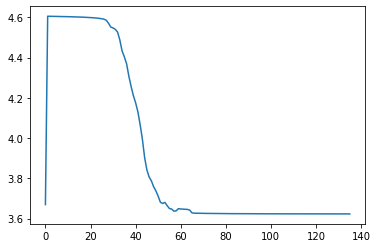

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(len(loss_list))
plt.plot(x,loss_list)
plt.show()

In [ ]:
corpus[0:20]

input = torch.Tensor([[5]]).long()
tt,h = model.forward(input,None)
print(tt)
print(tt.topk(6))


tensor([[1.6537e-03, 5.0106e-03, 6.9797e-03, 4.6286e-03, 1.9606e-03, 7.5650e-04,
         7.9434e-01, 2.5173e-02, 3.2794e-03, 1.2473e-03, 3.6444e-03, 2.3564e-03,
         5.1677e-03, 1.6386e-03, 3.0004e-03, 1.1903e-03, 1.6400e-03, 4.9065e-03,
         9.4263e-04, 1.6097e-03, 1.2935e-03, 1.3746e-03, 1.2469e-03, 1.4807e-03,
         6.8199e-04, 1.9540e-03, 1.3096e-03, 4.9108e-03, 7.2063e-04, 1.5059e-03,
         2.0091e-03, 2.1672e-03, 2.1353e-03, 9.8396e-04, 3.4713e-03, 1.2766e-03,
         1.5655e-03, 1.3207e-03, 2.6648e-03, 1.5454e-03, 1.2041e-03, 8.7829e-04,
         1.0790e-03, 2.0018e-03, 2.1206e-03, 6.7047e-04, 1.8060e-03, 1.7785e-03,
         1.4840e-03, 1.3894e-03, 1.5312e-03, 1.6352e-03, 1.4807e-03, 1.4497e-03,
         1.6310e-03, 1.5739e-03, 1.5879e-03, 1.4768e-03, 1.5889e-03, 1.2662e-03,
         1.6382e-03, 1.4607e-03, 1.6132e-03, 1.8467e-03, 1.5962e-03, 1.2794e-03,
         1.7894e-03, 1.5789e-03, 1.6658e-03, 1.7412e-03, 1.7732e-03, 1.6717e-03,
         1.3683e-03, 1.4819e

## 保存模型

In [ ]:
path = "/content/drive/MyDrive/ml/nlp/lstm-ptb.pth"

In [ ]:
torch.save(model.state_dict(),path)



## 加载模型

In [ ]:
model.load_state_dict(torch.load(path))

## 测试

In [ ]:
from common.util import most_similar


# ## CBOW 模型的评价

# print(model.inEmbedding.weight.shape)


word_vecs = model.embedding.weight.detach().to(device = "cpu").numpy()

querys = ['you','year','car','toyota']

for query in querys:
  most_similar(query,word_to_id,id_to_word,word_vecs)